In [55]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

num_samples = 1
T2_dim = 100
D_dim = 100
T2_lable_dim = 100
D_label_dim = 100
num_DT = 4
max_D = 10
max_T2 = 1
min_sep_D = 0.5
min_sep_T2 = 0.05
sig_D = 0.05
sig_T2 = 0.005
floor_amp = 0.3

# to generate gaussian distribution
def Gaussian_distribution(max_D, avg, num, sig):
    avg = avg.T
    xgrid = np.linspace(0, max_D, num)
    sqrt_2pi=np.power(2*np.pi,0.5)
    coef=1/(sqrt_2pi*sig)
    powercoef=-1/(2*np.power(sig,2))
    mypow=powercoef*(np.power((xgrid-avg),2))
    result = coef*(np.exp(mypow))
    return result/np.max(result, 1)[:, np.newaxis]

S = np.zeros([num_samples, D_dim, T2_dim])
label = np.zeros([num_samples, D_label_dim, T2_lable_dim])
b = np.linspace(0.01, 1, 100)[:, np.newaxis]
t = np.linspace(0.01, 1, 100)[:, np.newaxis]
nDT = np.random.randint(1, num_DT + 1, num_samples)
nDT[0] = 4

sample = 0
for i in np.arange(num_samples):
    D = np.ones([1, num_DT]).astype(float) * np.inf
    T2 = np.zeros([1, num_DT]).astype(float)
    signal = np.zeros([D_dim, T2_dim]).astype(float)
    label1 = np.zeros([D_label_dim, T2_lable_dim]).astype(float)
    labelD = np.zeros([1, D_label_dim]).astype(float)
    labelT2 = np.zeros([1, T2_lable_dim]).astype(float)

    for j in np.arange(nDT[i]):
        D_value = np.random.random() * max_D
        condition = True
        while condition:
            D_value = np.random.random() * max_D
            condition = np.min(np.abs(D - D_value)) < min_sep_D
        D[0, j] = D_value

        T2_value = np.random.random() * max_T2
        condition = True
        while condition:
            T2_value = np.random.random() * max_T2
            condition = np.min(np.abs(T2 - T2_value)) < min_sep_T2
        T2[0, j] = T2_value

    R = 1 / T2
    label_D = Gaussian_distribution(max_D, D, D_label_dim, sig=sig_D)
    label_T2 = Gaussian_distribution(max_T2, T2, T2_lable_dim, sig=sig_T2)
    for j in np.arange(nDT[i]):
        amp = np.abs(np.random.rand()) + floor_amp
        signal = signal + amp * np.dot(np.exp(-b * D[0, j]), np.exp(-t * R[0, j]).T)
        label1 = label1 + amp * np.dot(label_D[j, :][:, np.newaxis], label_T2[j, :][np.newaxis, :])
    S[i] = signal / np.max(signal)
    label[i] = label1 / np.max(label1)

/mnt/DATA1/chenbo/miniconda3/envs/ChineseNMT/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  


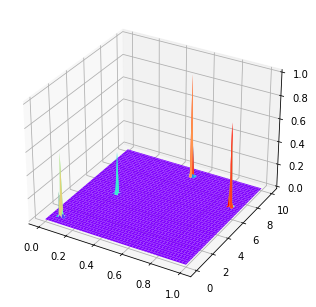

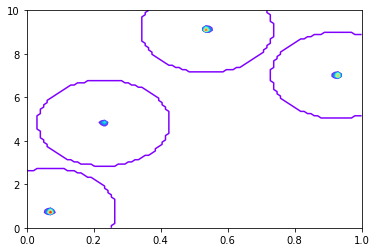

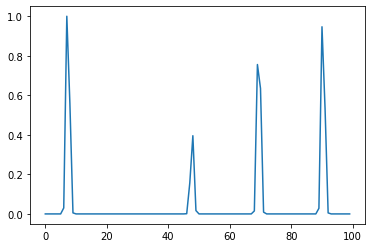

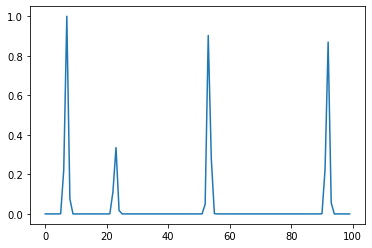

In [56]:
figure = plt.figure(1)
axes = Axes3D(figure)
X = np.linspace(0, 1, 100)
Y = np.linspace(0, 10, 100)
X,Y = np.meshgrid(X, Y)
Z = label[sample]
axes.plot_surface(X,Y,Z,cmap='rainbow')

plt.figure(2)
plt.contour(np.linspace(0, 1, 100), np.linspace(0, 10, 100), Z, 20, cmap='rainbow')
plt.show()

plt.figure(3)
plt.plot(np.sum(label, axis=2).T / np.max(np.sum(label, axis=2)))
plt.figure(4)
plt.plot(np.sum(label, axis=1).T / np.max(np.sum(label, axis=1)))

In [57]:
import scipy.io as scio 

b = b.T
t = t.T
scio.savemat('data/Laplace2D/S4_net_input.mat', {'S': S[0], 'b': b, 't': t, 'label': label[0]})